**<h2>AMAZON REVIEW SENTIMENT ANALYSIS</h2>**

----
----

This data repository can be found [here](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon/links.html )

<br>
A pair of product categories have been chosen for this project.

*   Home and Kitchen
*   Grocery and Gourmet Food

The datasets considered for this project are the **5-core** dataset and the **metadata** of each category.

The datasets have already been processed, combined and saved.

<br>

**<h4>Business Objectives :</h4>**
*   Apply natural language understanding to convert large set of text into more formal representations that are easier for manipulations.
*   Extract structured information from unstructured information.
*   Analyze the attitude or emotional state of the reviewers from their review texts.
*   Create a classification model to classify new reviews

<br>

**<h4> Project Approach :</h4>**
*   Using Natural Language Processing techniques to extract information from text data.
*   Preprocessing text data for modelling
*   Using classification algorithms to analyse unseen reviews and classify by sentiment .


----

# Libraries :

In [ ]:
# Libraries to handle datetime data
import datetime as dt                                   # To manipulate dates

# Libraries for data manipulation and visualization
import ast                                              # Abstract Syntax Trees (ast) package
import numpy as np                                      # To manipulate arrays
import pandas as pd                                     # To manipulate dataframes
from scipy import sparse                                # To manipulate spare matrices

import matplotlib.pyplot as plt                         # To create charts and graphs
from matplotlib.patches import ConnectionPatch          # For graphs
import seaborn as sns                                   # To visualize
from wordcloud import WordCloud,STOPWORDS               # To create world cloud graphs
import emoji                                            # For emojis

# Libraries to process text data
import re                                               # To apply regular expressions over string data
import string
import pycountry                                        # To convert ISO codes of languages into subjective strings

from langdetect import detect, DetectorFactory          # To detect language of the text
DetectorFactory.seed = 0                                # Setting seed value to enforce consistent results (Language detection is non-deterministic)

import spacy                                            # To create NLP objects
spacy.cli.download('en_core_web_lg')                    # Loading 'english' model trained on large datasets
nlp=spacy.load('en_core_web_lg')                        # Creating a spacy instance

# Libraries for transforming data
from sklearn.preprocessing import StandardScaler,MinMaxScaler                             # To scale the numeric data
from sklearn.model_selection import train_test_split                                      # To split data into train and test sets

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer               # To vectorize text data
from sklearn.preprocessing import MultiLabelBinarizer,LabelBinarizer                      # To encode and/or binarize data

# Libraries for statistical testing
import scipy.stats as sts                               # For chi square tests

# Libraries for building models
from sklearn.multiclass import OneVsRestClassifier      # To handle multilabeled target variables

from sklearn.linear_model import LogisticRegression     # For classification
from sklearn.naive_bayes import MultinomialNB           # For classification
from sklearn.linear_model import SGDClassifier          # For classification

# Libraries for evaluating models
from sklearn.metrics import confusion_matrix,classification_report    # To get classification model reports

# Libraries to handel warnings
import warnings
warnings.filterwarnings('ignore')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# Spacy pipeline
print('Original pipeline : ',nlp.pipe_names)

#nlp.disable_pipes()                                 # type in function to disable in the pipeline

print('Amended pipeline :',nlp.pipe_names)

Original pipeline :  ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Amended pipeline : ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


# Reading saved data :

In [ ]:
# Function to read a string as a literal
def read_string_literal(strg) :
  try :
    return ast.literal_eval(strg)
  except :
    return pd.NaT

# Function to convert column to datetime object
def date_time_column(col,format_date='%Y-%m-%d') :
  return pd.to_datetime(col,format=format_date)

#### Reviews data :

In [ ]:
# Reading reviews in chunks : CSV
dict1={}
convert_cols={'reviewTime':date_time_column,'pos_words':read_string_literal,'neg_words':read_string_literal,'categories':read_string_literal}
i=0
with pd.read_csv('/content/drive/MyDrive/capstone_project_data.csv',chunksize=50000,converters=convert_cols) as reader :
  reader
  for chunk in reader :
    dict1[i]=chunk
    i+=1

data=pd.concat(dict1,axis=0)
data=data.droplevel(level=0)

display(pd.concat([data.head(3),data.tail(3)],axis=0))

,reviewerID,asin,reviewerName,reviewText,overall,reviewTime,Positive_feedback,Total_feedback,helpfulness_ratio,price,...,neg_words,no_pos,no_neg,total_words,polarity,sentiment,weekday,brand,categories,set
0,APYOBQE6M18AA,0615391206,Martin Schwartz,My daughter wanted this book and the price on ...,5.0,2013-10-19,0,0,0.000000,17.29,...,[],3.0,0.0,14.0,0.21,Positive,Saturday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
1,A1JVQTAGHYOL7F,0615391206,Michelle Dinh,I bought this zoku quick pop for my daughterr ...,5.0,2014-06-18,0,0,0.000000,17.29,...,[],2.0,0.0,9.0,0.22,Positive,Wednesday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
2,A3UPYGJKZ0XTU4,0615391206,mirasreviews,There is no shortage of pop recipes available ...,4.0,2013-05-05,26,27,0.962963,17.29,...,"[shortage, scream, freeze, limited, gimmicky, ...",21.0,8.0,200.0,0.07,Neutral,Sunday,Zoku,"[Home & Kitchen, Kitchen & Dining, Kitchen Ute...",hk
702932,ASEBX8TBYWQWA,B00KCJRVO2,"Steven I. Ramm ""Steve Ramm &#34;Anything Phon...","While I usually review CDs and DVDs, as well a...",5.0,2014-07-01,1,1,1.000000,13.00,...,"[allergic, intolerance, concerned]",12.0,3.0,158.0,0.06,Neutral,Tuesday,Enjoy,[Grocery & Gourmet Food],ggf
702933,ANKQGTXHREOI5,B00KCJRVO2,Titanium Lili,My son and I enjoyed these oatmeal packets. H...,4.0,2014-07-04,0,1,0.000000,13.00,...,[junk],10.0,1.0,48.0,0.19,Positive,Friday,Enjoy,[Grocery & Gourmet Food],ggf
702934,A2CF66KIQ3RKX3,B00KCJRVO2,Vivian Deliz,I like to eat oatmeal i the mornings. I usuall...,4.0,2014-07-11,0,0,0.000000,13.00,...,"[suspect, cheap]",5.0,2.0,42.0,0.07,Neutral,Friday,Enjoy,[Grocery & Gourmet Food],ggf


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702935 entries, 0 to 702934
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   reviewerID         702935 non-null  object        
 1   asin               702935 non-null  object        
 2   reviewerName       696448 non-null  object        
 3   reviewText         702935 non-null  object        
 4   overall            702935 non-null  float64       
 5   reviewTime         702935 non-null  datetime64[ns]
 6   Positive_feedback  702935 non-null  int64         
 7   Total_feedback     702935 non-null  int64         
 8   helpfulness_ratio  702935 non-null  float64       
 9   price              632353 non-null  float64       
 10  language           702935 non-null  object        
 11  cleanText          702840 non-null  object        
 12  pos_words          702840 non-null  object        
 13  neg_words          702840 non-null  object  

In [ ]:
data.isnull().sum()

reviewerID               0
asin                     0
reviewerName          6487
reviewText               0
overall                  0
reviewTime               0
Positive_feedback        0
Total_feedback           0
helpfulness_ratio        0
price                70582
language                 0
cleanText               95
pos_words               95
neg_words               95
no_pos                  95
no_neg                  95
total_words             95
polarity                95
sentiment                0
weekday                  0
brand                    0
categories               0
set                      0
dtype: int64

#### Metadata data :

In [ ]:
# Reading meta in chunks : CSV
dict1={}
convert_cols={'categories':ast.literal_eval}
i=0
with pd.read_csv('/content/drive/MyDrive/capstone_project_meta_data.csv',chunksize=50000,converters=convert_cols) as reader :
  reader
  for chunk in reader :
    dict1[i]=chunk
    i+=1

meta_data=pd.concat(dict1,axis=0)
meta_data=meta_data.droplevel(level=0)

display(pd.concat([meta_data.head(3),meta_data.tail(3)],axis=0))

,asin,categories,title,description,price,brand,extracted_brand
0,0076144011,[Home & Kitchen],"Ninjas, Piranhas, and Galileo",NaN,NaN,Galileo,Galileo
1,0130350591,"[Home & Kitchen, Kitchen & Dining, Dining & En...",Le Creuset Kiwi (Green) Butter Dish Stoneware,Each piece of Le Creuset dinnerware is crafted...,NaN,Le Creuset,Le Creuset
2,0307394530,"[Home & Kitchen, Artwork, Posters & Prints]",Martha Stewart's Wedding Cakes,Of all the decisions that go into planning a w...,14.99,Random House,Martha Stewart
608745,B00LOXAZ1Q,[Grocery & Gourmet Food],"Sour Punch Blue Raspberry Bite, 5 Ounce Bag --...",Sour Punch candy is the brand of mouth waterin...,16.55,Sour Punch,Sour Punch
608746,B00LOZ7F0S,[Grocery & Gourmet Food],Organic Mexican Vanilla,"Our Vanilla Extract made from\nPremium, Organi...",NaN,Premium,Premium
608747,B00LQWKDBM,[Grocery & Gourmet Food],Mrs. Grass Onion Soup and Dip Mix,NaN,NaN,Unknown,Unknown


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608748 entries, 0 to 608747
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   asin             608748 non-null  object 
 1   categories       608748 non-null  object 
 2   title            606850 non-null  object 
 3   description      549310 non-null  object 
 4   price            398320 non-null  float64
 5   brand            608745 non-null  object 
 6   extracted_brand  608745 non-null  object 
dtypes: float64(1), object(6)
memory usage: 37.2+ MB


In [ ]:
meta_data.isnull().sum()

asin                    0
categories              0
title                1898
description         59438
price              210428
brand                   3
extracted_brand         3
dtype: int64

# Functions used in classification :

In [ ]:
# String of punctuations
puncts=re.sub("'|`",'',string.punctuation)                 # Removing ' and ` from a string of punctuations

# Function to split data in train and test sets
def split_train_test(features,target,random_value,test_ratio=0.2) :
  train_x, test_x, train_y, test_y = train_test_split(features,target, random_state=random_value, test_size=test_ratio)

  print('Shape of train set :',train_x.shape,
       '\n\nShape of test set :',test_x.shape,
       '\n\nShape of target train set :',train_y.shape,
       '\n\nShape of target test set  :',test_y.shape,)

  return train_x, test_x, train_y, test_y

# Function for text pre processing
def txtpreprocess(old_txt,punctuation_string,nlp_obj=False) :
  try :
    new_txt=re.sub('http\S+','',old_txt)                                                                       # removing any web links
    new_txt=re.sub('`',"'",new_txt)                                                                            # replacing ` with ' so that stop words can be detected
    new_txt=''.join(x.lower() for x in new_txt if x not in punctuation_string and x not in string.digits)      # removing punctuations and digits
    new_txt=re.sub('[\n|\t|\r]*','',new_txt)                                                                   # removing escape characters
    new_txt=re.sub('x{2,}|X{2,}|ok{2,}','',new_txt)                                                            # removing repeat words

    txt_obj=nlp(new_txt)                                                                                       # NLP object based on cleaned text

    if nlp_obj==False :                                                                                # Block is executed if nlp_obj parameter is set to False
      token_list=[token.lemma_ for token in txt_obj if token.lemma_ not in stop_words_list and
                  token.lemma_ !='I' and token.is_space==False and len(token)>2 and
                  token.is_oov==False and token.ent_type_!='PERSON']                                           # list of lemmatized tokens satisfying given conditions
      return ' '.join(token for token in token_list)                                                           # returns this list as a string (cleaned text)

    else :
       return txt_obj                                                                                  # Block is executed if nlp_obj parameter is set to True

  except :
    return ''

# Function to predict new reviews
def new_review(feedback,vectorizer,model) :
  feedback=[txtpreprocess(old_txt=feedback,punctuation_string=puncts,nlp_obj=False)]
  v_txt=vectorizer.transform(feedback)

  return lb.inverse_transform(model.predict(v_txt))

# Data transformations :

In [ ]:
# Dataframe subset to be used for model building
df=data[data['language'].eq('English')][['cleanText','overall','sentiment']]              # Only english language reviews which are less than 50 words long
df['overall']=df['overall'].astype(int)

display(df.head(3))

print('\n\nDistribution of records along sentiments :\n')
display(df['sentiment'].value_counts())

#print('\nDistribution of records along ratings :\n')
#display(df['rating'].value_counts())

,cleanText,overall,sentiment
0,daughter want book price amazon good try recip...,5,Positive
1,buy quick pop quick maker love fun ice cream,5,Positive
2,shortage pop recipe available free web purchas...,4,Neutral




Distribution of records along sentiments :



Neutral     370469
Positive    247059
Negative     85317
Name: sentiment, dtype: int64

In [ ]:
# Checking the text dataframe
print('Null count before :')
display(df.isnull().sum())

# Droping null values
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

print('\nNull count after :')
display(df.isnull().sum())

Null count before :


cleanText    5
overall      0
sentiment    0
dtype: int64


Null count after :


cleanText    0
overall      0
sentiment    0
dtype: int64

In [ ]:
# Vectorizing text data
tfidf=TfidfVectorizer()               # creating an instance of the vectorizer : TFIDF
vec_text=tfidf.fit_transform(df['cleanText'])

count_vec=CountVectorizer()           # creating an instance of the vectorizer : Count vectorizer
cvec_text=count_vec.fit_transform(df['cleanText'])

In [ ]:
# Using label binariser to create binary data for each sentiment class
lb=LabelBinarizer()

target_binarized=lb.fit_transform(df['sentiment'])

print('The classes are :\n',lb.classes_)
display(target_binarized)

The classes are :
 ['Negative' 'Neutral' 'Positive']


array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [ ]:
# Splitting the sampled dataset into train and test sets : TFIDF vectorised
print('TFIDF vectorised :')
train_x, test_x, train_y, test_y = split_train_test(vec_text,target_binarized, random_value=42, test_ratio=0.2)

# Splitting the sampled dataset into train and test sets : Count vectorised
print('\n\nCount vectorised :')
train_x2, test_x2, train_y2, test_y2 = split_train_test(cvec_text,target_binarized, random_value=8, test_ratio=0.2)

TFIDF vectorised :
Shape of train set : (562272, 46148) 

Shape of test set : (140568, 46148) 

Shape of target train set : (562272, 3) 

Shape of target test set  : (140568, 3)


Count vectorised :
Shape of train set : (562272, 46148) 

Shape of test set : (140568, 46148) 

Shape of target train set : (562272, 3) 

Shape of target test set  : (140568, 3)


# Models :

One vs Rest Classifier ( Multilabelled target )

*   Logistic Regression
*   Multinomial Naive Bayes
*   Support Vector Classifier


In [ ]:
# Creating a dataframe to store and compare predictions of varios models with the test data
result=pd.DataFrame(lb.inverse_transform(test_y),columns=['actual'])            # using inverse_transform function of label binarizer to get class names : TFIDF vectorized

result_cv=pd.DataFrame(lb.inverse_transform(test_y2),columns=['actual'])            # using inverse_transform function of label binarizer to get class names : Count vectorized

print('TFIDF vectorised :')
display(result.head(10).T)
print('\n\nCount vectorised :\n')
display(result_cv.head(10).T)

TFIDF vectorised :


,0,1,2,3,4,5,6,7,8,9
actual,Positive,Neutral,Neutral,Positive,Neutral,Neutral,Neutral,Negative,Positive,Positive




Count vectorised :



,0,1,2,3,4,5,6,7,8,9
actual,Neutral,Positive,Neutral,Negative,Neutral,Positive,Positive,Neutral,Positive,Positive


### Multinomial Naive Bayes Classifier :

In [ ]:
# TFIDF vecorized data
model_mnb=MultinomialNB()                       # Creating model instance

ovr = OneVsRestClassifier(model_mnb)

# Fitting the training sets
ovr.fit(train_x,train_y)

# Predicting
pred_mnb = ovr.predict(test_x)

result['Multi_NB']=lb.inverse_transform(pred_mnb)

# Model evaluation
report_mnb=classification_report(result['actual'],result['Multi_NB'],output_dict=True)

display(pd.crosstab(result['actual'],result['Multi_NB'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result['actual'],result['Multi_NB']))

Multi_NB,Negative,Neutral,Positive,support
actual,,,,
Negative,3471,13354,10,16835
Neutral,14797,56913,2681,74391
Positive,13327,15042,20973,49342





              precision    recall  f1-score   support

    Negative       0.11      0.21      0.14     16835
     Neutral       0.67      0.77      0.71     74391
    Positive       0.89      0.43      0.57     49342

    accuracy                           0.58    140568
   macro avg       0.55      0.47      0.48    140568
weighted avg       0.68      0.58      0.60    140568



In [ ]:
# Count Vectorized text data
model_mnb_cv=MultinomialNB()                  # Creating model instance

ovr_cv = OneVsRestClassifier(model_mnb_cv)

# Fitting the training sets
ovr_cv.fit(train_x2,train_y2)

# Predicting
result_cv['Multi_NB']=lb.inverse_transform(ovr_cv.predict(test_x2))

# Model evaluation
cv_report_mnb=classification_report(result_cv['actual'],result_cv['Multi_NB'],output_dict=True)

display(pd.crosstab(result_cv['actual'],result_cv['Multi_NB'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result_cv['actual'],result_cv['Multi_NB']))

Multi_NB,Negative,Neutral,Positive,support
actual,,,,
Negative,13408,3672,127,17207
Neutral,24638,35856,13279,73773
Positive,3620,8725,37243,49588





              precision    recall  f1-score   support

    Negative       0.32      0.78      0.46     17207
     Neutral       0.74      0.49      0.59     73773
    Positive       0.74      0.75      0.74     49588

    accuracy                           0.62    140568
   macro avg       0.60      0.67      0.60    140568
weighted avg       0.69      0.62      0.63    140568



**<h3> Model preformance : </h3>**


*   TFIDF model has good recall and precision for neutral class, but is not giving good metrics for positive and negative classes.

*   Count vectorizer model has good recall and precision for positive class, but is not giving good metrics for neutral and negative classes.




### Logistic Regression :

In [ ]:
# TFIDF vectorized data
lr = LogisticRegression(max_iter=200, verbose=1)           # Creating instance of Logistic Regression algorithm
ovr2 = OneVsRestClassifier(lr)                             # One vs Rest classifier using Log Reg for multiclass target variable

# Fitting the training data to the classifier
ovr2.fit(train_x, train_y)

# Predicting classes using test data
result['Log_Reg']=lb.inverse_transform(ovr2.predict(test_x))

# Model evaluation
report_lr=classification_report(result['actual'],result['Log_Reg'],output_dict=True)

display(pd.crosstab(result['actual'],result['Log_Reg'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result['actual'],result['Log_Reg']))

Log_Reg,Negative,Neutral,Positive,support
actual,,,,
Negative,14327,2508,0,16835
Neutral,15042,57920,1429,74391
Positive,1108,6866,41368,49342





              precision    recall  f1-score   support

    Negative       0.47      0.85      0.61     16835
     Neutral       0.86      0.78      0.82     74391
    Positive       0.97      0.84      0.90     49342

    accuracy                           0.81    140568
   macro avg       0.77      0.82      0.77    140568
weighted avg       0.85      0.81      0.82    140568



In [ ]:
# Count vectorized data
lr_cv = LogisticRegression(max_iter=200, verbose=1)           # Creating instance of Logistic Regression algorithm
ovr2_cv = OneVsRestClassifier(lr_cv)                          # One vs Rest classifier using Log Reg for multiclass target variable

# Fitting the training data to the classifier
ovr2_cv.fit(train_x2, train_y2)

# Predicting classes using test data
result_cv['Log_Reg']=lb.inverse_transform(ovr2_cv.predict(test_x2))

# Model evaluation
cv_report_lr=classification_report(result_cv['actual'],result_cv['Log_Reg'],output_dict=True)

display(pd.crosstab(result_cv['actual'],result_cv['Log_Reg'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result_cv['actual'],result_cv['Log_Reg']))

Log_Reg,Negative,Neutral,Positive,support
actual,,,,
Negative,16736,471,0,17207
Neutral,22623,50262,888,73773
Positive,510,8438,40640,49588





              precision    recall  f1-score   support

    Negative       0.42      0.97      0.59     17207
     Neutral       0.85      0.68      0.76     73773
    Positive       0.98      0.82      0.89     49588

    accuracy                           0.77    140568
   macro avg       0.75      0.82      0.74    140568
weighted avg       0.84      0.77      0.78    140568



**<h3> Model preformance : </h3>**



*   TFIDF model has good recall and precision for all three classes, and has a high accuracy.

*   Count vectorizer model has good metrics for all three classes but gives lesser accuracy than TFIDF logistic regression.




### Support Vector Classifier :

In [ ]:
# TFIDF vectorized data
svc = SGDClassifier()                                       # Creating instances of a Support Vector Classifier
ovr3 = OneVsRestClassifier(svc)                             # One vs Rest classifier using SVC for multiclass target variable

# Fitting the training data to the classifier
ovr3.fit(train_x, train_y)

# Predicting classes using test data
result['SVC']=lb.inverse_transform(ovr3.predict(test_x))

# Model evaluation
report_svc=classification_report(result['actual'],result['SVC'],output_dict=True)

display(pd.crosstab(result['actual'],result['SVC'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result['actual'],result['SVC']))

SVC,Negative,Neutral,Positive,support
actual,,,,
Negative,5709,11126,0,16835
Neutral,7214,64492,2685,74391
Positive,2103,8683,38556,49342





              precision    recall  f1-score   support

    Negative       0.38      0.34      0.36     16835
     Neutral       0.77      0.87      0.81     74391
    Positive       0.93      0.78      0.85     49342

    accuracy                           0.77    140568
   macro avg       0.69      0.66      0.67    140568
weighted avg       0.78      0.77      0.77    140568



In [ ]:
# TFIDF vectorized data
svc_cv = SGDClassifier()                                       # Creating instances of a Support Vector Classifier
ovr3_cv = OneVsRestClassifier(svc_cv)                          # One vs Rest classifier using SVC for multiclass target variable

# Fitting the training data to the classifier
ovr3_cv.fit(train_x2, train_y2)

# Predicting classes using test data
result_cv['SVC']=lb.inverse_transform(ovr3_cv.predict(test_x2))

# Model evaluation
cv_report_svc=classification_report(result_cv['actual'],result_cv['SVC'],output_dict=True)

display(pd.crosstab(result_cv['actual'],result_cv['SVC'],margins=True,margins_name='support').drop('support',axis=0))
print('\n\n')
print(classification_report(result_cv['actual'],result_cv['SVC']))

SVC,Negative,Neutral,Positive,support
actual,,,,
Negative,15329,1877,1,17207
Neutral,22935,48751,2087,73773
Positive,1645,4737,43206,49588





              precision    recall  f1-score   support

    Negative       0.38      0.89      0.54     17207
     Neutral       0.88      0.66      0.76     73773
    Positive       0.95      0.87      0.91     49588

    accuracy                           0.76    140568
   macro avg       0.74      0.81      0.73    140568
weighted avg       0.85      0.76      0.78    140568



**<h3> Model preformance : </h3>**



*   TFIDF model has good recall and precision for neutral and positive class, but performs poorly for negative class.

*   Count vectorizer model has good recall and precision for all classes, but has lower accuracy than logistic regression tfidf model.





# Evaluation :

In [ ]:
# List of variables
list_senti=['Positive','Neutral','Negative']
list_models=['Multinomial Naive Bayes','Logistic Regression','Support Vector Classifier']

list_tfidf=[report_mnb,report_lr,report_svc]
list_count_vec=[cv_report_mnb,cv_report_lr,cv_report_svc]

In [ ]:
# Accuracy of models
df_acc=pd.DataFrame()
for i in range(len(list_tfidf)) :
  df_acc.loc[i,'Model names']=list_models[i]
  df_acc.loc[i,'TFIDF']=list_tfidf[i]['accuracy']
  df_acc.loc[i,'Count Vectoriser']=list_count_vec[i]['accuracy']

df_acc=round(df_acc,4)
df_acc.set_index('Model names',inplace=True)
df_acc

,TFIDF,Count Vectoriser
Model names,,
Multinomial Naive Bayes,0.5788,0.6154
Logistic Regression,0.8083,0.7657
Support Vector Classifier,0.7737,0.7632


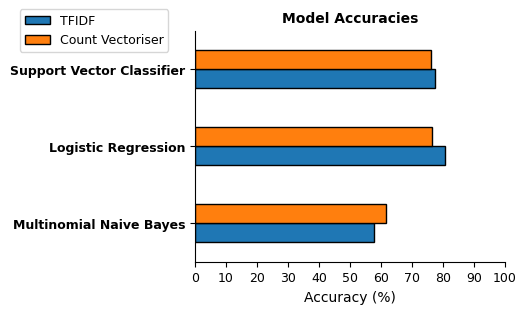

In [ ]:
# Plotting the accuracies
vals=[str(np.round(x,2))+'%' for x in 100*df_acc.values.flatten()]

fig=plt.figure()
ax=fig.add_subplot()
df_acc.plot(kind='barh',edgecolor='black',figsize=(4,3),label=True,rot=0,ax=ax)
#annotations()
plt.xticks(ticks=np.arange(0,1.1,0.1),labels=np.arange(0,110,10),fontsize=9)
plt.yticks(fontweight='bold',fontsize=9)
plt.xlabel('Accuracy (%)')
plt.ylabel('')
plt.title('Model Accuracies',fontweight='bold',fontsize=10)
plt.legend(bbox_to_anchor=(-0.065,1.12),fontsize=9)
ax.spines[['top','right']].set_visible(False)
plt.show()

fig.savefig('classif_accuracy',bbox_inches='tight')

In [ ]:
# Evaluating by classes
df_senti_tfidf=pd.DataFrame()
df_senti_cv=pd.DataFrame()

for tf,cv,mod in zip(list_tfidf,list_count_vec,list_models) :
  for s in list_senti :
    d1=round(pd.json_normalize(tf[s]),3)
    d2=round(pd.json_normalize(cv[s]),3)

    d1[['model','class']]=mod,s
    d2[['model','class']]=mod,s

    df_senti_tfidf=pd.concat([df_senti_tfidf,d1],axis=0)
    df_senti_cv=pd.concat([df_senti_cv,d2],axis=0)

df_senti_tfidf.set_index(['model','class'],inplace=True)
df_senti_cv.set_index(['model','class'],inplace=True)

df_classes=pd.concat({'TFIDF':df_senti_tfidf,'Count Vectorizer':df_senti_cv},axis=1)
display(df_classes)

TFIDF                          \
                                   precision recall f1-score support   
model                     class                                        
Multinomial Naive Bayes   Positive     0.886  0.425    0.575   49342   
                          Neutral      0.667  0.765    0.713   74391   
                          Negative     0.110  0.206    0.143   16835   
Logistic Regression       Positive     0.967  0.838    0.898   49342   
                          Neutral      0.861  0.779    0.818   74391   
                          Negative     0.470  0.851    0.606   16835   
Support Vector Classifier Positive     0.935  0.781    0.851   49342   
                          Neutral      0.765  0.867    0.813   74391   
                          Negative     0.380  0.339    0.358   16835   

                                   Count Vectorizer                          
                                          precision recall f1-score support  
model                     class                                              
Multinomial Naive Bayes   Positive            0.735  0.751    0.743   49588  
                          Neutral             0.743  0.486    0.588   73773  
                          Negative            0.322  0.779    0.455   17207  
Logistic Regression       Positive            0.979  0.820    0.892   49588  
                          Neutral             0.849  0.681    0.756   73773  
                          Negative            0.420  0.973    0.586   17207  
Support Vector Classifier Positive            0.954  0.871    0.911   49588  
                          Neutral             0.881  0.661    0.755   73773  
                          Negative            0.384  0.891    0.537   17207

In [ ]:
# Line chart for recalls


In [ ]:
df_classes.loc['Logistic Regression','TFIDF']

,precision,recall,f1-score,support
class,,,,
Positive,0.967,0.838,0.898,49342
Neutral,0.861,0.779,0.818,74391
Negative,0.470,0.851,0.606,16835


# GUI :



Amazon [link](https://www.amazon.in/KWER-Multi-Purpose-Accessories-Multi-Layer-Organizer/dp/B0C3HRCHKT/ref=asc_df_B0C3HRCHKT/?tag=googleshopdes-21&linkCode=df0&hvadid=656067512114&hvpos=&hvnetw=g&hvrand=7376807132302628742&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9299774&hvtargid=pla-2197122928075&gclid=Cj0KCQjw9rSoBhCiARIsAFOipln8_afKRN07PbBDqdKHfgSFXV3XWAm-SuFSRXSWhhZbciYlMOcLhyoaArNuEALw_wcB&th=1)  to get new reviews.





In [ ]:
# @title Test a review { run: "auto", vertical-output: true, form-width: "40%", display-mode: "form" }

Feedback ="Love the product. Only hitch is that the magnets keep moving so you'll need to move them back to place. Love the quality and the space inside."  # @param {type:'string'}

result=new_review(feedback=Feedback,vectorizer=tfidf,model=ovr2)[0]

if result=='Positive' :
  print(emoji.emojize('Feedback sentiment : %s :green_circle:' %result))
elif result=='Negative' :
  print(emoji.emojize('Feedback sentiment : %s :red_circle:' %result))
else :
  print(emoji.emojize('Feedback sentiment : %s :white_circle:' %result))


Feedback sentiment : Positive 🟢


In [ ]:
# @title Test a review { run: "auto", vertical-output: true, form-width: "40%", display-mode: "form" }

Feedback ="Ordered and replaced but both time got defective piece, magnet was separated to basket pipe. 2 nd time magnet was missing and pipe base was broken . Better they should 1st self check the product before shipping. Over expensive product. I have attached pics for reference. There was dent in 1st item."  # @param {type:'string'}

result=new_review(feedback=Feedback,vectorizer=tfidf,model=ovr2)[0]

if result=='Positive' :
  print(emoji.emojize('Feedback sentiment : %s :green_circle:' %result))
elif result=='Negative' :
  print(emoji.emojize('Feedback sentiment : %s :red_circle:' %result))
else :
  print(emoji.emojize('Feedback sentiment : %s :white_circle:' %result))


Feedback sentiment : Negative 🔴
